In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

import windIO
import foam
import wind

In [14]:
maindir = "D:/tempData_depot/simData_CandC/schemes/"
# caseNames = ["tngE2.c1", "tngE2.t.bw", "tngE2.t.cn", "tngE2.t.cn.9", "vwt.base", "vwt.t.bw", "vwt.t.cn", "vwt.t.cn.9"]
caseNames = ["vwt.base", "vwt.t.bw", "vwt.t.cn", "vwt.t.cn.9", "vwt.t.cn.pmpl"]
# caseNames = ["tngE2.c1", "tngE2.t.bw", "tngE2.t.cn", "tngE2.t.cn.9"]

probeName = 'smpl.zProf_x0y0'
H = 0.08

In [15]:
les = []
for cn in caseNames:
    caseDir = os.path.join(maindir,cn)
    print(caseDir)
    df = foam.processVelProfile(caseDir,probeName=probeName,name=cn,exportPlots=False, trimTimeSegs=[[0,1.0]],H=H)
    les.append(df)
    

D:/tempData_depot/simData_CandC/schemes/vwt.base
Processing OpenFOAM case:	D:/tempData_depot/simData_CandC/schemes/vwt.base
Probe read from:		D:/tempData_depot/simData_CandC/schemes/vwt.base/postProcessing/smpl.zProf_x0y0
Target profile read from:	None
  >> Reading probe data ...
           reading U from: D:/tempData_depot/simData_CandC/schemes/vwt.base/postProcessing/smpl.zProf_x0y0/0/U
           reading U from: D:/tempData_depot/simData_CandC/schemes/vwt.base/postProcessing/smpl.zProf_x0y0/7.2/U
    Trimming overlapping times.
   Trimming times: [[0, 1.0]]
    Adopted time step: 0.002
             << Done!
  >> Processing profile data.
             << Done!
  >> Finished reading probe data.
D:/tempData_depot/simData_CandC/schemes/vwt.t.bw
Processing OpenFOAM case:	D:/tempData_depot/simData_CandC/schemes/vwt.t.bw
Probe read from:		D:/tempData_depot/simData_CandC/schemes/vwt.t.bw/postProcessing/smpl.zProf_x0y0
Target profile read from:	None
  >> Reading probe data ...
           read

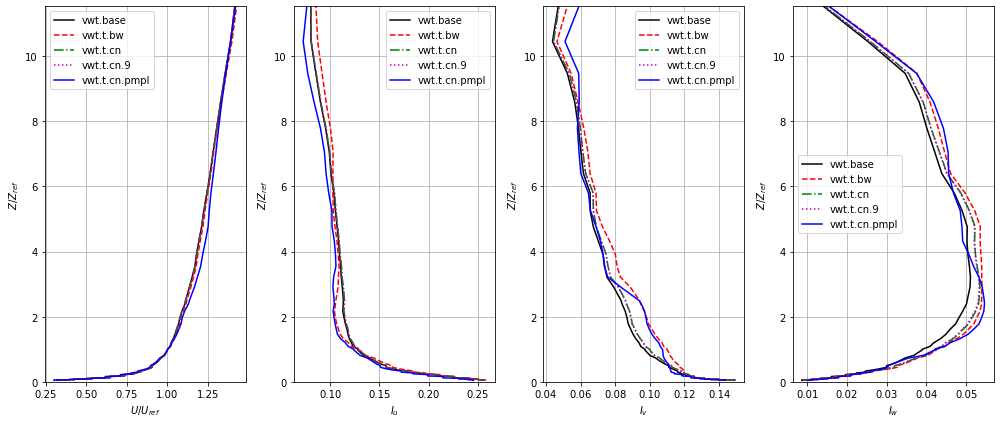

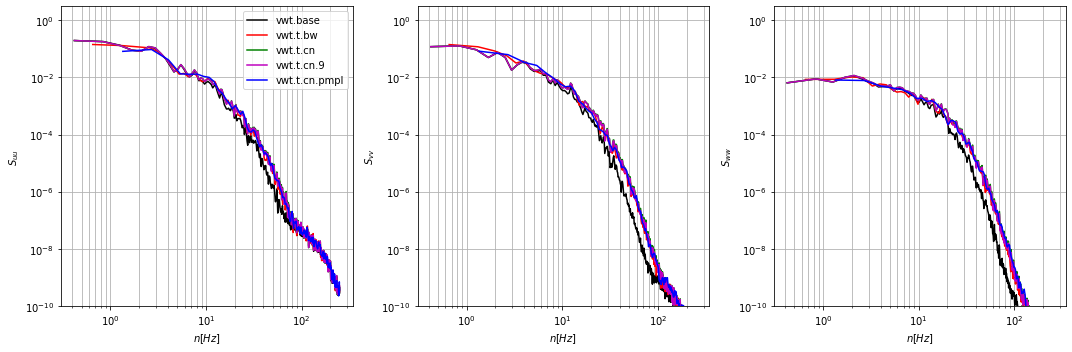

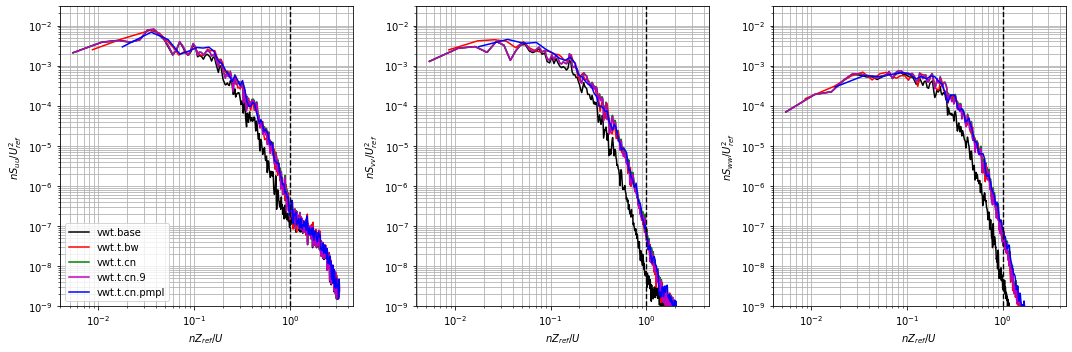

In [16]:
vel = wind.Profiles(les)
vel.plotProfiles()

yl = [1e-10,3e-0]
vel.plotSpectra(yLimits=[yl,yl,yl],normalize=False)

yl = [1e-9,3e-2]
vel.plotSpectra(yLimits=[yl,yl,yl],normalize=True)

In [33]:
print(vel.N)

5


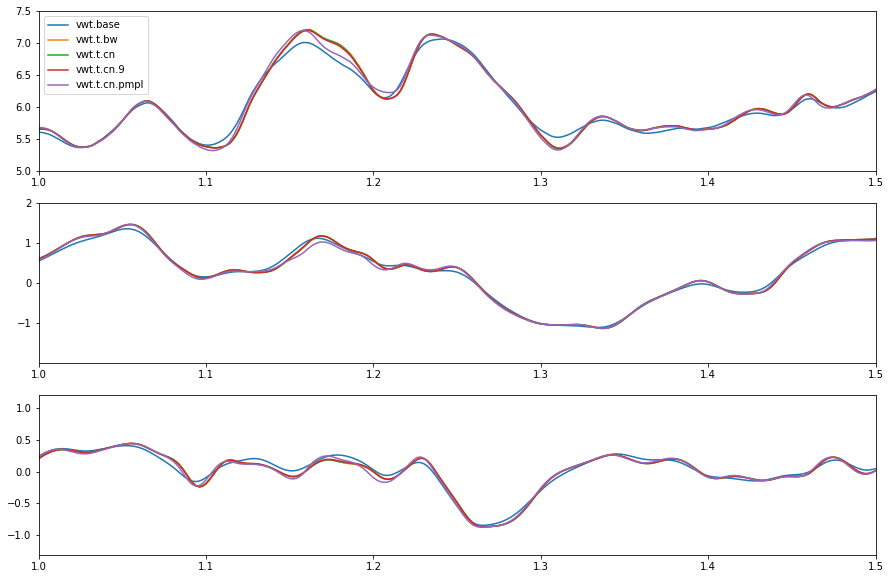

In [32]:
# vel.plotTimeHistory(figSize=[15,10], xLimits=[0,1])

plt.figure(figsize=[15,10])
# plt.subplots(3,1,sharey=True)
tlim = [1,1.5]
ylim = [5,7.5]
ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)

for v in vel:
    ax1.plot(v.t ,v.SpectH.UofT, label=v.name)
    ax1.set_xlim(tlim)
    ax1.set_ylim(ylim)
    ax1.legend()

    ax2.plot(v.t ,v.SpectH.VofT, label=v.name)
    ax2.set_xlim(tlim)
    # ax2.set_ylim(ylim)
    
    ax3.plot(v.t ,v.SpectH.WofT, label=v.name)
    ax3.set_xlim(tlim)
    # ax3.set_ylim(ylim)



In [7]:
xtime = {
    'vwt.base': 42190.23+35915.66,
    'vwt.t.bw': 0,
    'vwt.t.cn': 40711.3+38816.36,
    'vwt.t.cn.9': 9157.64+3486.99+42205.72+11065.7
    }